# Early Nyquist Results for Stability

In [2]:
import requests as req, os

URL = "https://raw.githubusercontent.com/mit-acl/16_06_Class/main/"
File = ["basic_material.py","control_materials.py"]

if not os.path.isfile(File[0]):
    print('Basic files not found - downloading them')
    for dfile in File:
        if not os.path.isfile(dfile):
            print("Downloading "+dfile)
            res = req.get(URL+dfile)
            file = open(dfile, 'w')
            file.write(res.text)
            file.close()

print('Basic file found')
%run basic_material.py

from control.matlab import tf, lsim, step, rlocus, feedback, rss, lsim, c2d, margin
from control import bode_plot, nyquist_plot
    
import cmath
from control_materials import *

Basic file found
Running Python: 3.8.19
Running Sympy: 1.12.1
Control Package Found


## Examples from Lecture 16


   0.38 s^2 + 0.038 s + 0.209
---------------------------------
s^4 + 1.06 s^3 + 0.56 s^2 + 0.5 s



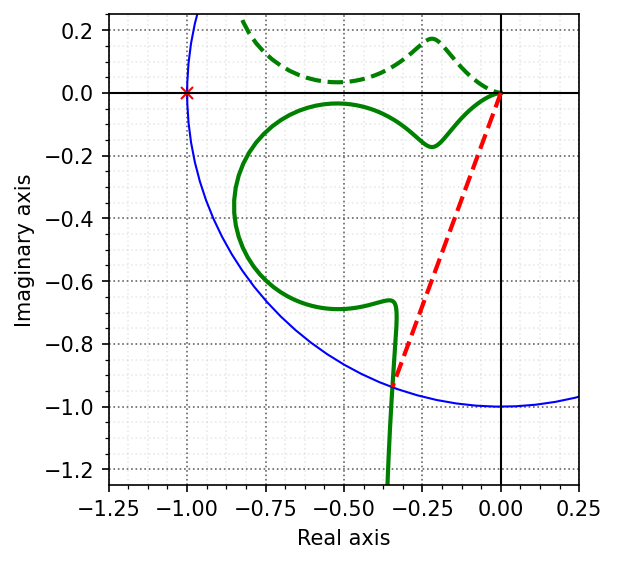

Phase Margin = 69.77

Found breakin/out at K = 0.632
At possible locations s = -0.513
8.0 4.0


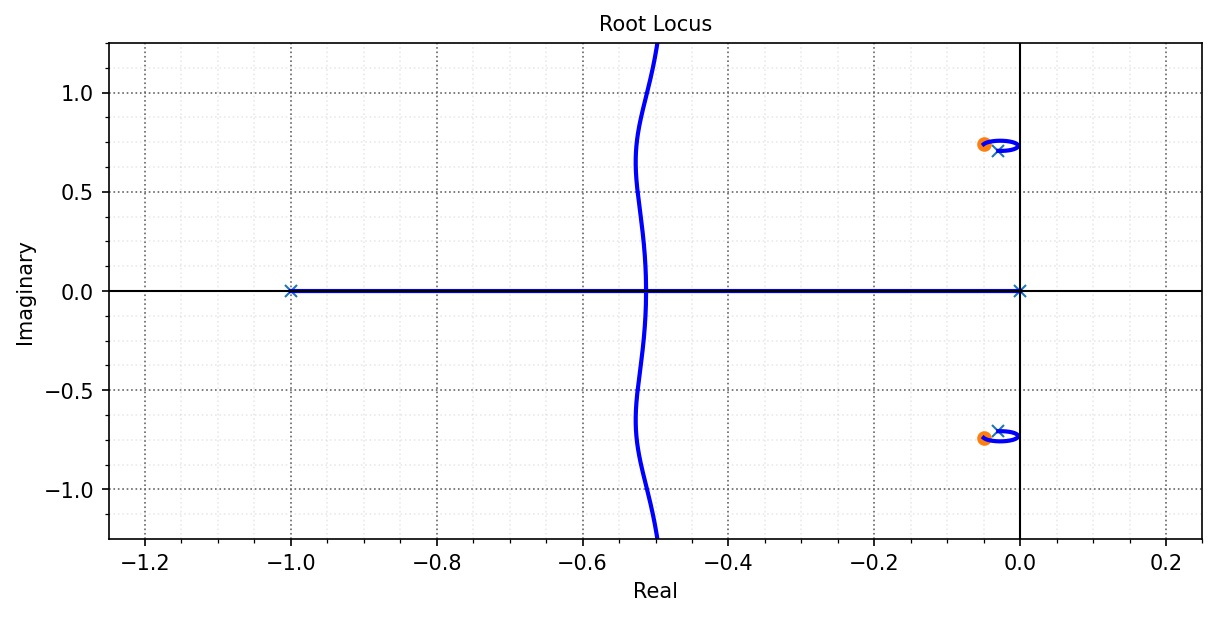

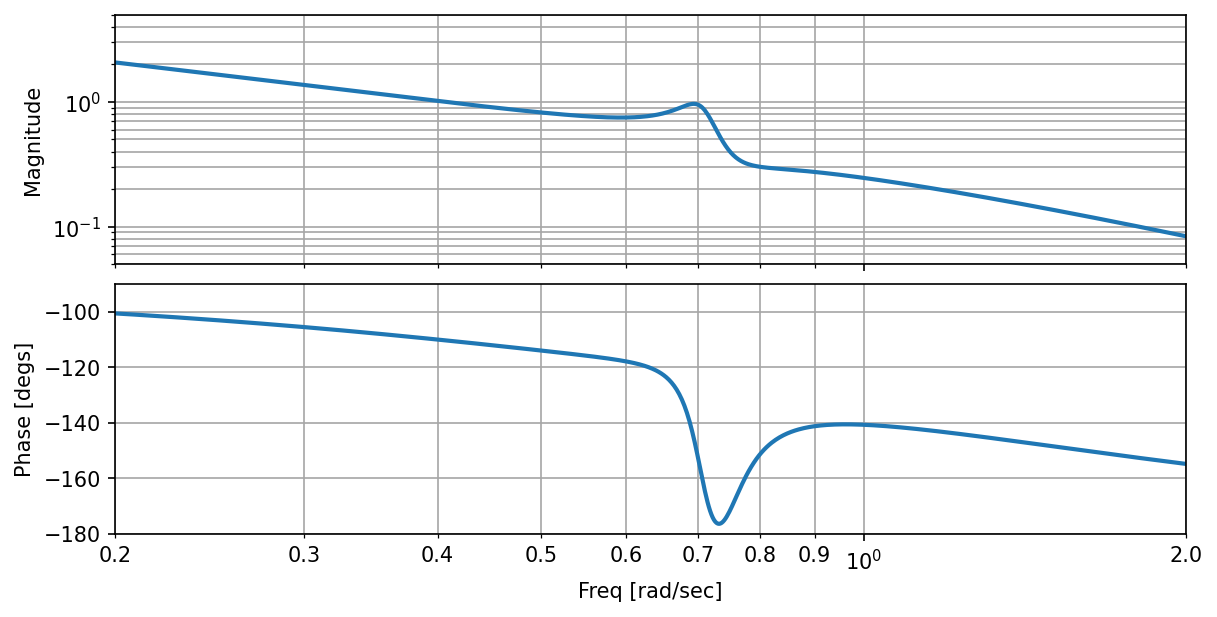

In [3]:
from control_materials import *
# L17 PM/GM Examples
w = np.logspace(-3,3,5000)
an = np.linspace(0, 2 * np.pi, 100) # unit circle

#L(s) =  \frac{0.38( s^2 + 0.1 s + 0.55)}{s(s+1)(s^2+0.06s+0.5)}
G = 0.38*tf([1],[1, 1, 0])*tf([1,.1,.55],[1,.06,.5]) 
print(G)

[Gm,Gp,Gw] = bode_plot(G,plot=False,omega=w)

fig, ax = plt.subplots(1,figsize=(4, 4),dpi=150,constrained_layout = True)
plt.sca(ax);kwargs = {'color':'g'}
nyquist_plot(G,w,indent_direction='right',indent_points=100,**kwargs)
#lines = ax.get_lines()
#[lines[x].set_linestyle('-') for x in range(int(len(lines)/2.))]

plt.plot(np.cos(an), np.sin(an),'b-',lw=1)
plt.plot(-1,0,'rx',ms=6)
ax.set_aspect('equal')
plt.xlim([-1.25,.25])
plt.ylim([-1.25,.25])
nicegrid(ax)

gm, pm, wcg, wcp =  margin(G)
#print([gm,wcg,pm,wcp])
plt.plot([0,-np.cos(pm/r2d)],[0,-np.sin(pm/r2d)],'r--')
savefig("./figs/L19_GM_PM_1.pdf", dpi=600)
plt.show()

print("Phase Margin = {:3.2f}".format(pm))

fig, ax = plt.subplots(1,figsize=(8, 4),dpi=150,constrained_layout = True)
rlist, klist = rlocus(G, kvect=Root_Locus_gains(G), plotstr='b-', grid=False, ax=ax)
ax.set_xlim([-6, 2]);
ax.set_ylim([-10, 10])
nicegrid(ax)
ax.set_xlim([-1.25,.25])
ax.set_ylim([-1.25,1.25])
savefig("./figs/L19_GM_PM_1a.pdf", dpi=600)

fig, ax = plt.subplots(2,1,figsize=(8, 4),dpi=150, sharex = True,constrained_layout = True)
ax[0].loglog(Gw,Gm)
ax[1].semilogx(Gw,Gp*r2d)
ax[0].set_xlim([.2,2])
ax[0].set_ylim([.05,5])
ax[1].set_ylim([-180,-90])
ax[1].set_xlabel('Freq [rad/sec]')
ax[1].set_ylabel('Phase [degs]')
ax[0].set_ylabel('Magnitude')
ax[0].grid(True, which="both", ls="-",color='0.65')
ax[1].grid(True, which="both", ls="-",color='0.65')
import matplotlib.ticker as mticker
ax[1].xaxis.set_minor_formatter(mticker.ScalarFormatter())
savefig("./figs/L19_GM_PM_1b.pdf", dpi=600)

fig_width, fig_height = plt.gcf().get_size_inches()
print(fig_width, fig_height)


   0.38 s^2 + 0.038 s + 0.209
---------------------------------
s^4 + 1.06 s^3 + 0.56 s^2 + 0.5 s



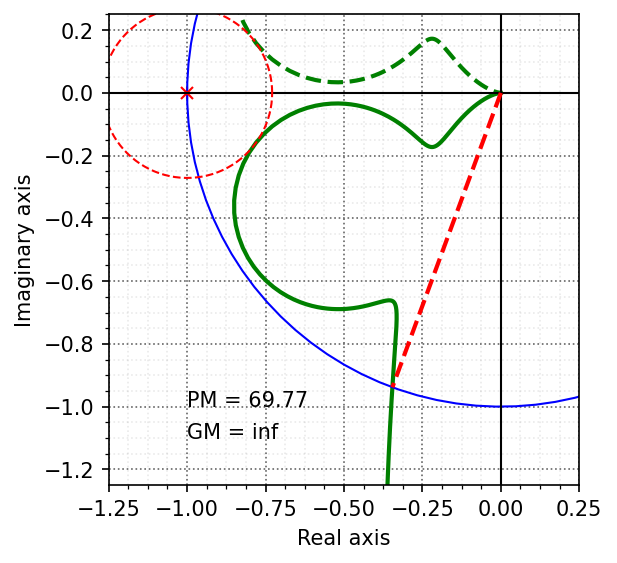

In [4]:
# L17 PM/GM Examples - Robustness Question
w = np.logspace(-3,3,5000)
an = np.linspace(0, 2 * np.pi, 100) # unit circle

#L(s) =  \frac{0.38( s^2 + 0.1 s + 0.55)}{s(s+1)(s^2+0.06s+0.5)}
G = 0.38*tf([1],[1, 1, 0])*tf([1,.1,.55],[1,.06,.5]) 
print(G)

[Gm,Gp,Gw] = bode_plot(G,plot=False,omega=w)

fig, ax = plt.subplots(1,figsize=(4, 4),dpi=150,constrained_layout = True)
plt.sca(ax);kwargs = {'color':'g'}
nyquist_plot(G,w,indent_direction='right',indent_points=100,**kwargs)

plt.plot(np.cos(an), np.sin(an),'b-',lw=1)
plt.plot(-1,0,'rx',ms=6)
ax.set_aspect('equal')
plt.xlim([-1.25,.25])
plt.ylim([-1.25,.25])
nicegrid(ax)

gm, pm, wcg, wcp =  margin(G)
plt.plot([0,-np.cos(pm/r2d)],[0,-np.sin(pm/r2d)],'r--')

Gf = G(complex(0,1)*w)
S = 1/(1+Gf)
dist_from_cp = 1/np.max(np.abs(S))
plt.plot(-1+dist_from_cp*np.cos(an), dist_from_cp*np.sin(an),'r--',lw=1)

ax.text(-1,-1,"PM = {:3.2f}".format(pm))
ax.text(-1,-1.1,"GM = {:3.2f}".format(gm))
savefig("./figs/L19_Rob_1.pdf", dpi=600)
plt.show()



    0.38 s^2 - 0.0285 s + 0.361
-----------------------------------
s^4 + 1.025 s^3 + 0.925 s^2 + 0.9 s



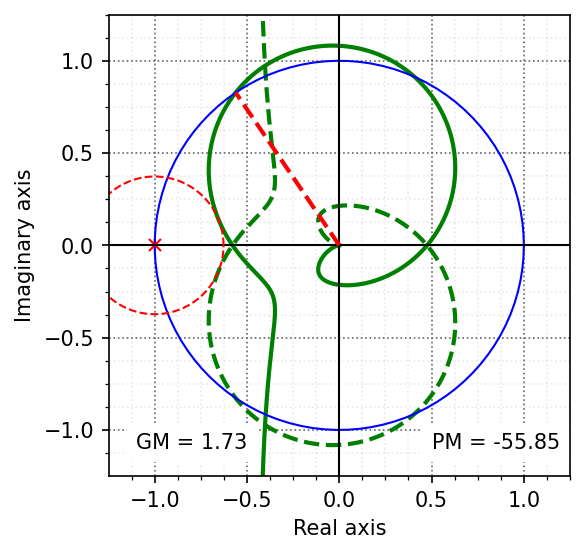

Phase Margin = -55.85

Found breakin/out at K = 0.605
At possible locations s = -0.499


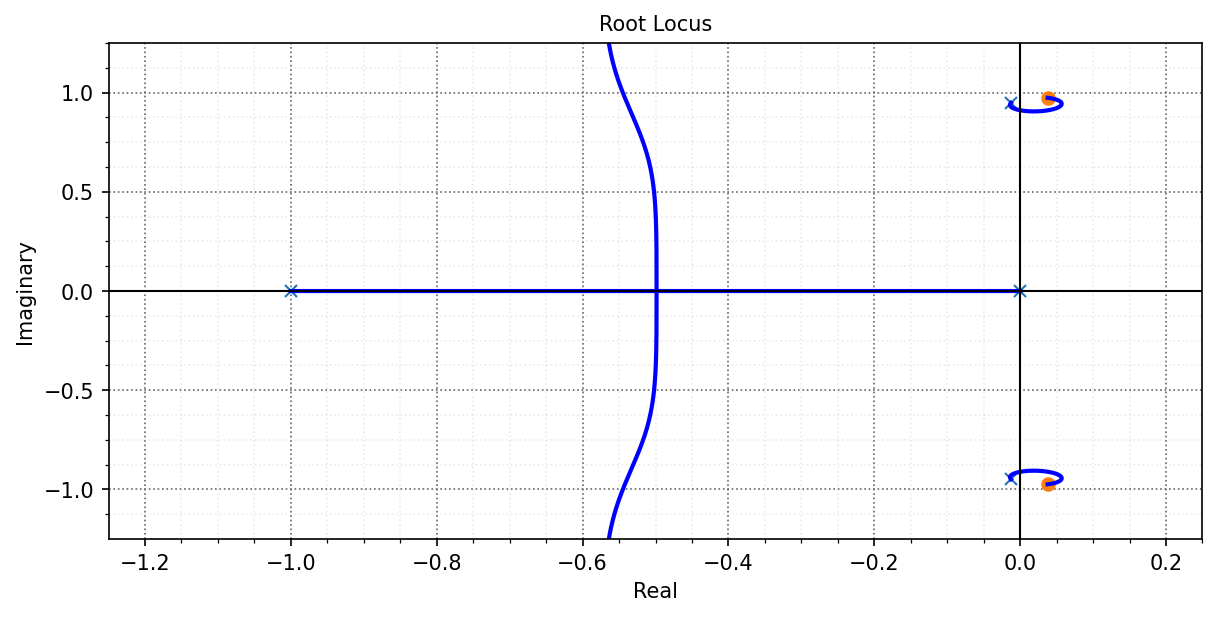

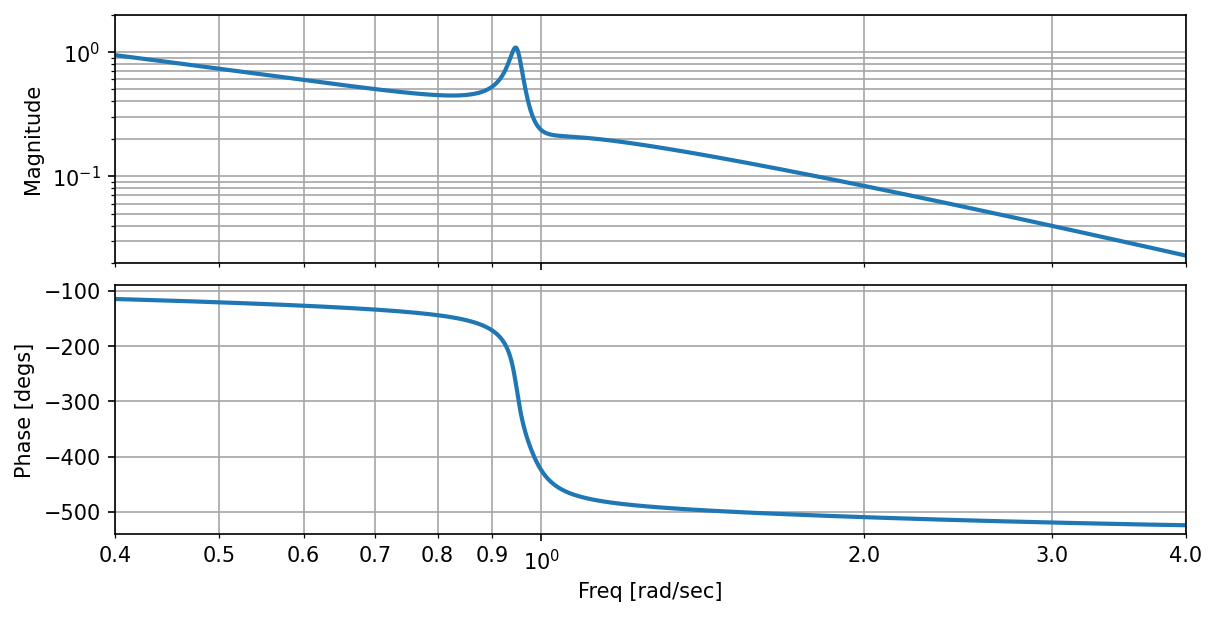

In [5]:
#L(s) =  \frac{0.3( s^2 - 0.075 s + 0.95)}{s(s+1)(s^2+0.025s+0.9)}
w = np.logspace(-3,3,50000)
G = 0.38*tf([1],[1, 1, 0])*tf([1,-.075,.95],[1,.025,.9]) 
print(G)

[Gm,Gp,Gw] = bode_plot(G,plot=False,omega=w)

fig, ax = plt.subplots(1,figsize=(4, 4),dpi=150)
plt.sca(ax);
kwargs = {'color':'g'}
nyquist_plot(G,w,indent_direction='right',indent_points=100,**kwargs)
plt.plot(np.cos(an), np.sin(an),'b-',lw=1)
plt.plot(-1,0,'rx',ms=6)
ax.set_aspect('equal')
plt.xlim([-1.25,1.25])
plt.ylim([-1.25,1.25])
nicegrid(ax,-1)

gm, pm, wcg, wcp =  margin(G)
plt.plot([0,-np.cos(pm/r2d)],[0,-np.sin(pm/r2d)],'r--')
Gf = G(complex(0,1)*w)
S = 1/(1+Gf)
dist_from_cp = 1/np.max(np.abs(S))
plt.plot(-1+dist_from_cp*np.cos(an), dist_from_cp*np.sin(an),'r--',lw=1)

ax.text(.5,-1.1,"PM = {:3.2f}".format(pm),backgroundcolor = 'w', color = 'k')
ax.text(-1.1,-1.1,"GM = {:3.2f}".format(gm),backgroundcolor = 'w', color = 'k')

savefig("./figs/L19_GM_PM_2.pdf", dpi=600)
plt.show()

print("Phase Margin = {:3.2f}".format(pm))

plt.rcParams.update({'figure.autolayout': True})

fig, ax = plt.subplots(1,figsize=(8, 4),dpi=150,constrained_layout = True)
rlist, klist = rlocus(G, kvect=Root_Locus_gains(G), plotstr='b-', grid=False,ax=ax)
ax.set_xlim([-6, 2]);
ax.set_ylim([-10, 10])
nicegrid(ax)
ax.set_xlim([-1.25,.25])
ax.set_ylim([-1.25,1.25])
savefig("./figs/L19_GM_PM_2a.pdf", dpi=600)

fig, ax = plt.subplots(2,1,figsize=(8, 4),dpi=150, sharex = True,constrained_layout = True)
ax[0].loglog(Gw,Gm)
ax[1].semilogx(Gw,pshift(Gp)*r2d)
ax[0].set_xlim([.4,4])
ax[0].set_ylim([.02,2])
ax[1].set_ylim([-540,-90])
ax[0].grid(True, which="both", ls="-",color='0.65')
ax[1].grid(True, which="both", ls="-",color='0.65')
ax[1].set_xlabel('Freq [rad/sec]')
ax[1].set_ylabel('Phase [degs]')
ax[0].set_ylabel('Magnitude')
import matplotlib.ticker as mticker
ax[1].xaxis.set_minor_formatter(mticker.ScalarFormatter())
savefig("./figs/L19_GM_PM_2b.pdf", dpi=600)



    0.38 s^2 - 0.0285 s + 0.361
-----------------------------------
s^4 + 1.025 s^3 + 0.925 s^2 + 0.9 s



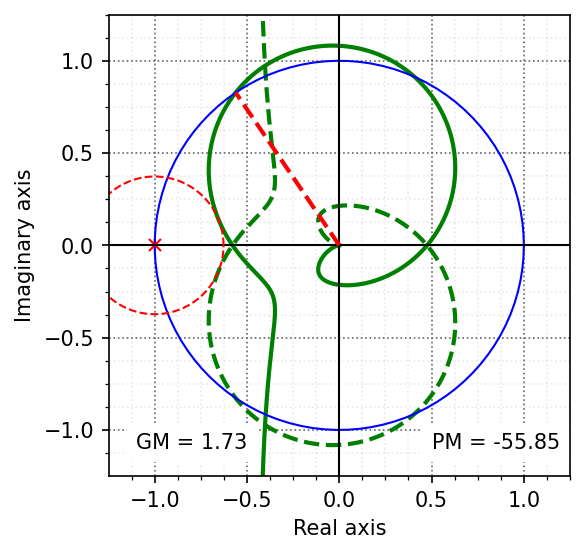

In [6]:
w = np.logspace(-3,3,50000)
G = 0.38*tf([1],[1, 1, 0])*tf([1,-.075,.95],[1,.025,.9]) 
print(G)

[Gm,Gp,Gw] = bode_plot(G,plot=False,omega=w)

fig, ax = plt.subplots(1,figsize=(4, 4),dpi=150)
plt.sca(ax);
kwargs = {'color':'g'}
nyquist_plot(G,w,indent_direction='right',indent_points=100,**kwargs)
#lines = ax.get_lines()
#[lines[x].set_linestyle('-') for x in range(int(len(lines)))]
plt.plot(np.cos(an), np.sin(an),'b-',lw=1)
plt.plot(-1,0,'rx',ms=6)
ax.set_aspect('equal')
plt.xlim([-1.25,1.25])
plt.ylim([-1.25,1.25])
nicegrid(ax,-1)

gm, pm, wcg, wcp =  margin(G)
plt.plot([0,-np.cos(pm/r2d)],[0,-np.sin(pm/r2d)],'r--')
Gf = G(complex(0,1)*w)
S = 1/(1+Gf)
dist_from_cp = 1/np.max(np.abs(S))
plt.plot(-1+dist_from_cp*np.cos(an), dist_from_cp*np.sin(an),'r--',lw=1)

ax.text(.5,-1.1,"PM = {:3.2f}".format(pm),backgroundcolor = 'w', color = 'k')
ax.text(-1.1,-1.1,"GM = {:3.2f}".format(gm),backgroundcolor = 'w', color = 'k')
savefig("./figs/L19_Rob_2.pdf", dpi=600)
plt.show()

## Stability analysis example on 17-12


Found breakin/out at K = 3.732
At possible locations s = -1.366

Found breakin/out at K = 0.268
At possible locations s = 0.366


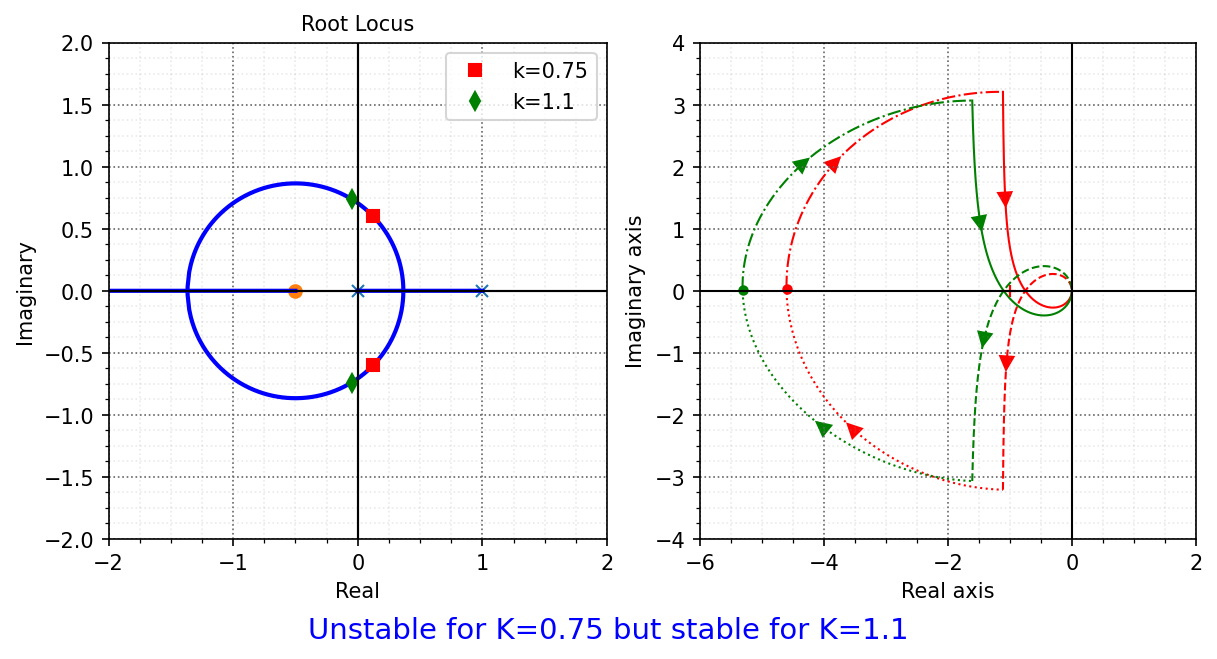

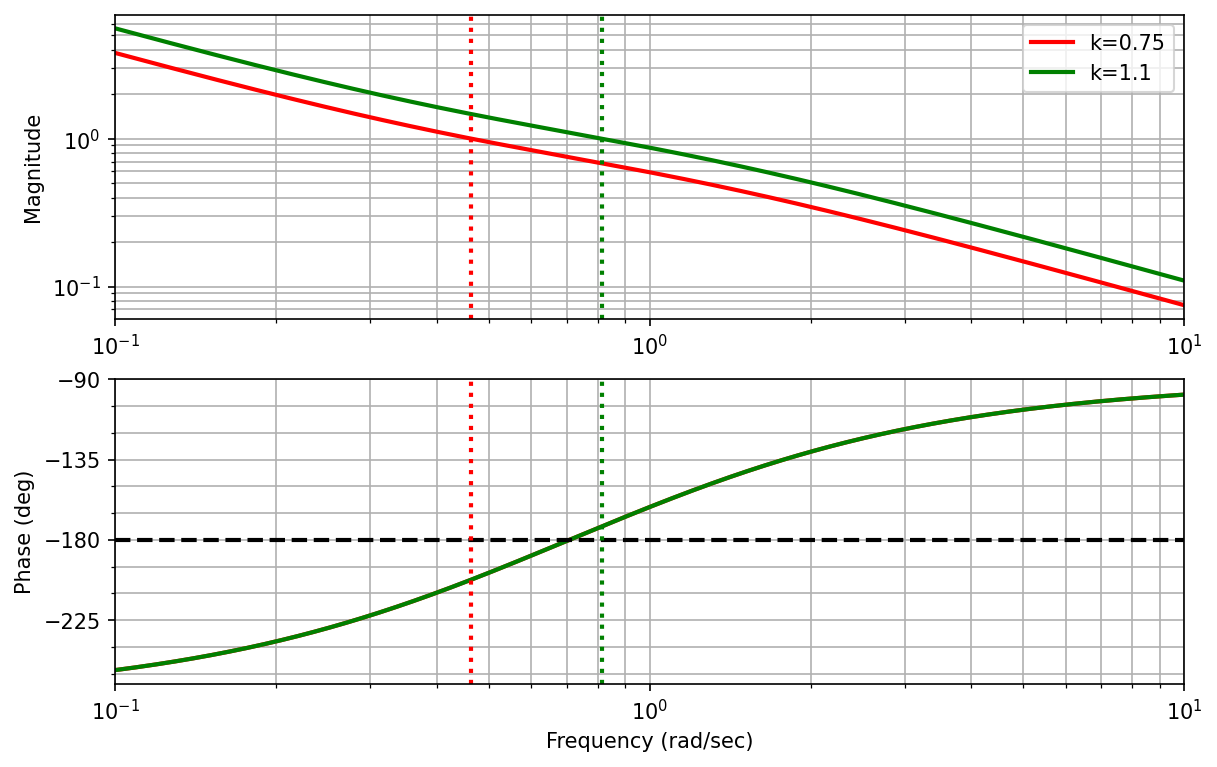

In [7]:
gain1 = 0.75
gain2 = 1.1
G = 0.5*tf((2,1),(1,-1,0))
Gcl1 = feedback(G,gain1)
Gcl3 = feedback(G,gain2)
scl1 = Gcl1.poles()
scl3 = Gcl3.poles()

fig, ax = plt.subplots(1,2,figsize=(8, 4),dpi=150,constrained_layout = True)
rlist, klist = rlocus(G, kvect=Root_Locus_gains(G), plotstr='b-', grid=False,ax=ax[0])
ax[0].set_xlim([-2, 2]);ax[0].set_ylim([-2, 2])
nicegrid(ax[0])
#ax[0].set_title('Gamma > 0, K={:2d}'.format(K),loc='left')
ax[0].plot(scl1.real,scl1.imag,'rs',ms=6,label='k='+str(gain1))
ax[0].plot(scl3.real,scl3.imag,'gd',ms=6,label='k='+str(gain2))
h, l = ax[0].get_legend_handles_labels()
ax[0].legend(handles=[item for item in h[2:]], labels= [item for item in l[2:]])
                                                    
RR = .15
plt.sca(ax[1])
kwargs = {'color':'r','linewidth':1}
nyquist_plot(gain1*G,w,indent_direction='right',indent_radius=gain1*RR,indent_points=200,**kwargs)
kwargs = {'color':'g','linewidth':1}
nyquist_plot(gain2*G,w,indent_direction='right',indent_radius=RR*gain2,indent_points=200,**kwargs)
plt.xlim([-6,2])
plt.ylim([-4,4])
ax[1].set_aspect('equal')
nicegrid(ax)
caption("Unstable for K="+str(gain1)+" but stable for K="+str(gain2),fig)
savefig('./figs/L15_10.pdf')
plt.show()

fig, ax = plt.subplots(1,2,figsize=(8, 5),dpi=150,constrained_layout = True)
kwargs = {'color':'r','linewidth':2}
Gfreq1 = bode_plot(gain1*G,plot=True,**kwargs,dB=False)
kwargs = {'color':'g','linewidth':2}
Gfreq3 = bode_plot(gain2*G,plot=True,**kwargs,dB=False)

ax1,ax2 = plt.gcf().axes
ax1.legend(('k='+str(gain1),'k='+str(gain2)))
ax2.axhline(y=-180,c='k',ls="--")
wc1 = np.interp(1,np.flipud(Gfreq1[0]),np.flipud(Gfreq1[2]))
wc3 = np.interp(1,np.flipud(Gfreq3[0]),np.flipud(Gfreq3[2]))
ax1.axvline(x=wc1,c='r',ls=":")
ax2.axvline(x=wc1,c='r',ls=":")
ax1.axvline(x=wc3,c='g',ls=":")
ax2.axvline(x=wc3,c='g',ls=":")
ax[0].set_xlabel("Frequency [rad/sec]")
savefig('./figs/L15_11.pdf')
plt.show()